In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv('activity_pct.csv')
df2 = pd.DataFrame([[3,np.nan,np.nan,np.nan], [12,np.nan,np.nan,np.nan]], columns=df.columns)
df=df.append(df2)
df=df.sort('card',ascending=False)

In [3]:
df

,card,pct_clicked_expert,pct_clicked_hyperlink,pct_clicked_magnify
0,21,0.187247,0.625056,0.646161
1,20,NaN,0.473070,0.271993
2,19,0.242940,0.177947,0.442403
3,18,NaN,0.003584,0.200717
4,17,0.273053,0.558639,0.437780
5,16,0.218206,0.348951,0.334226
6,15,0.194209,0.455234,0.420935
7,14,0.205162,0.427236,0.445483
8,13,NaN,0.498667,0.347556
1,12,NaN,NaN,NaN


In [39]:
sns.set_context("poster")

def activity_chart(df,ymin=0,ymax=22,fig_height=18):
    width = 0.2
    cards = range(min(df['card']),max(df['card'])+1)
    print cards
    fig, ax = plt.subplots(figsize=(6,fig_height))
    rects1 = ax.barh(df['card']-width,df['pct_clicked_hyperlink'],width,color='#88CCFF',edgecolor='none')
    rects2 = ax.barh(df['card'],df['pct_clicked_magnify'],width,color='#FFD38A',edgecolor='none')
    rects3 = ax.barh(df['card']+width,df['pct_clicked_expert'],width,color='#FFFC98',edgecolor='none')
    ax.set_xlabel('Students that Clicked')
    ax.set_ylabel('Card')
    ax.set_title('Activity Engagement by Card')
    ax.set_yticks([c + width for c in cards])
    ax.set_yticklabels(cards, va='bottom')

    x_format = tkr.FuncFormatter(lambda x, p: '{:.0%}'.format(x))
    ax.xaxis.set_major_formatter(x_format)
    ax.legend((rects1[0], rects2[0], rects3[0]), ('Hyperlink', 'Magnify','Expert'))
    ax.set_ylim([ymin,ymax])
    plt.gca().invert_yaxis()

    def autolabel(rects):
        # attach label if null
        for rect in rects:
            width = rect.get_width()
            if pd.isnull(width):
                ax.text(0,rect.get_y() + rect.get_height()/2.,
                    'X',
                    ha='left', va='center')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


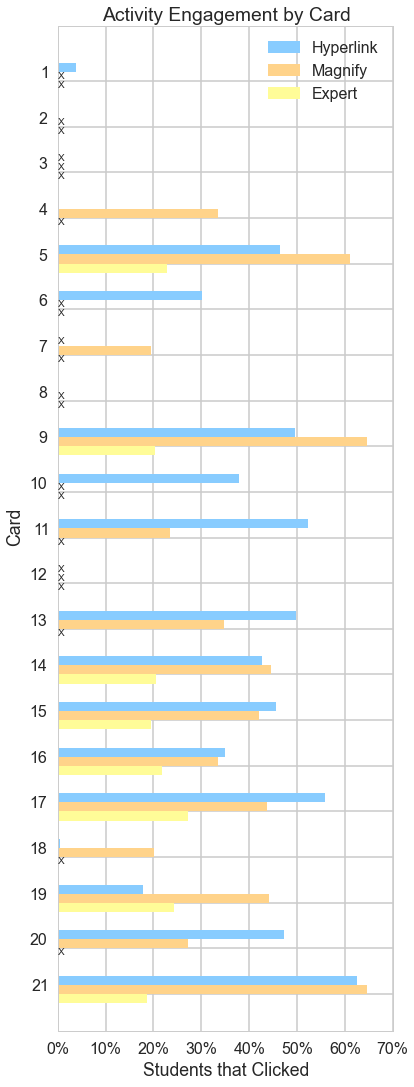

In [40]:
activity_chart(df)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


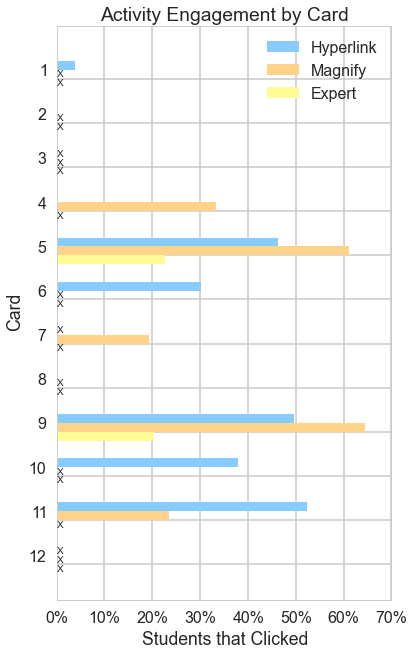

In [41]:
activity_chart(df[9:],0,13,12./21*18)

[13, 14, 15, 16, 17, 18, 19, 20, 21]


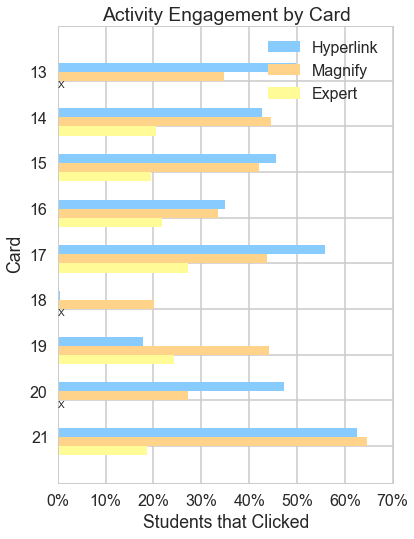

In [43]:
activity_chart(df[:9],12,22,(10.)/22*18)

In [38]:
min(df['card'])

1